In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor

## Load the dataset

In [2]:
#Reading the adtaset into Jupyter Environment using variable path of easy replication
Path = '../Data/'
Filename = 'Heart.csv'
Dataset = pd.read_csv(Path + Filename, index_col=0)

In [3]:
#Looking at th few segment of the data and other characteristics
print (Dataset.head)
print (Dataset.tail)
print(Dataset.describe(include = 'all'))

<bound method NDFrame.head of      Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    1       typical     145   233    1        2    150      0   
2     67    1  asymptomatic     160   286    0        2    108      1   
3     67    1  asymptomatic     120   229    0        2    129      1   
4     37    1    nonanginal     130   250    0        0    187      0   
5     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
299   45    1       typical     110   264    0        0    132      0   
300   68    1  asymptomatic     144   193    1        0    141      0   
301   57    1  asymptomatic     130   131    0        0    115      1   
302   57    0    nontypical     130   236    0        2    174      0   
303   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  AHD-con  
1        2.3      3  0.0       fixed   N

In [4]:
#Check NaN
len(Dataset)-Dataset.count()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
AHD-con      0
dtype: int64

**From the above, it shows that columns; Ca and Thal are missing 4 and 2 observations respectively. There are several ways that missing obs can be dealt with but since the data did not come with an individual variable description and not having much knowledge about them I will just drop those observations for simplicity.**

## Data Preprocessing

In [6]:
#Check the number of unique entries in every variables
for i in Dataset.columns:
    print(i)
    print(Dataset[i].unique())

Age
[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
Sex
[1 0]
ChestPain
['typical' 'asymptomatic' 'nonanginal' 'nontypical']
RestBP
[145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
Chol
[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 228 193 271 210 327 149 295 306 178 237 218 242 319 166 180 3

In [8]:
#drop the rows with NaNs
Dataset.dropna(inplace=True)
Dataset.reset_index(drop=True, inplace=True)

In [9]:
#Check if there are still NaN
len(Dataset)-Dataset.count()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
AHD-con      0
dtype: int64

**ENCODING CATEGORICAL FEATURES**

In [11]:
# create dummy variables
Dataset1= pd.get_dummies(Dataset, columns=[ 'Sex', 'ChestPain','Fbs','RestECG','ExAng','Slope', 'Ca','Thal'])
print(Dataset1.head())

   Age  RestBP  Chol  MaxHR  Oldpeak  AHD  AHD-con  Sex_0  Sex_1  \
0   63     145   233    150      2.3   No        0      0      1   
1   67     160   286    108      1.5  Yes        1      0      1   
2   67     120   229    129      2.6  Yes        1      0      1   
3   37     130   250    187      3.5   No        0      0      1   
4   41     130   204    172      1.4   No        0      1      0   

   ChestPain_asymptomatic  ...  Slope_1  Slope_2  Slope_3  Ca_0.0  Ca_1.0  \
0                       0  ...        0        0        1       1       0   
1                       1  ...        0        1        0       0       0   
2                       1  ...        0        1        0       0       0   
3                       0  ...        0        0        1       1       0   
4                       0  ...        1        0        0       1       0   

   Ca_2.0  Ca_3.0  Thal_fixed  Thal_normal  Thal_reversable  
0       0       0           1            0                0  
1   

'Age','RestBP','Chol','MaxHR','Oldpeak','Sex_0','Sex_1','ChestPain_asymptomatic','ChestPain_nonanginal',
                    'ChestPain_nontypical','ChestPain_typical','Fbs_0','Fbs_1','RestECG_0','RestECG_1','RestECG_2','ExAng_0',
                    'ExAng_1','Slope_1','Slope_2','Slope_3','Ca_0.0','Ca_1.0','Ca_2.0','Ca_3.0','Thal_fixed','Thal_normal','Thal_reversable'

**Dividing the DataFrame to Response and Explanatory Variables**

In [12]:
# extract the Independent Variables
X = np.array(Dataset1.drop(['AHD', 'AHD-con'], axis=1).values, dtype='float64')
X = X[:,1:]
print(X[:5,:])
print(np.isnan(X).sum(axis=0))

[[145.  233.  150.    2.3   0.    1.    0.    0.    0.    1.    0.    1.
    0.    0.    1.    1.    0.    0.    0.    1.    1.    0.    0.    0.
    1.    0.    0. ]
 [160.  286.  108.    1.5   0.    1.    1.    0.    0.    0.    1.    0.
    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.    0.    1.
    0.    1.    0. ]
 [120.  229.  129.    2.6   0.    1.    1.    0.    0.    0.    1.    0.
    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.    1.    0.
    0.    0.    1. ]
 [130.  250.  187.    3.5   0.    1.    0.    1.    0.    0.    1.    0.
    1.    0.    0.    1.    0.    0.    0.    1.    1.    0.    0.    0.
    0.    1.    0. ]
 [130.  204.  172.    1.4   1.    0.    0.    0.    1.    0.    1.    0.
    0.    0.    1.    1.    0.    1.    0.    0.    1.    0.    0.    0.
    0.    1.    0. ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
# extract the Dependent Variables
y = np.array(Dataset1['AHD-con'].values, dtype='float64')
print(y)

[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1.]


**Standardization**

*Standardize the independent variables by removing the mean and scaling to unit variance so that the bigger variables do not dominant*

In [15]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

**Creating Training and  Testing Set**

In [16]:
#Split the Data into Training and Testing Set 70/30 respectively (percentage choice, following common practices) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

## Model Training

In [27]:
LogRegSM = sm.Logit(y_train,X_train).fit()
print(LogRegSM.summary2())

         Current function value: 0.283473
         Iterations: 35
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.589     
Dependent Variable:   y                 AIC:               155.3580  
Date:                 2019-10-22 00:41  BIC:               218.6796  
No. Observations:     207               Log-Likelihood:    -58.679   
Df Model:             18                LL-Null:           -142.78   
Df Residuals:         188               LLR p-value:       2.0421e-26
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.8579        0.2666  3.2182 0.0013         0.3354        1.3804
x2   0.3657        0.2647  1.3813 0.1672        -0.1

C:\Users\CHERPENS\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\CHERPENS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


**From the model above most of the variables should not enter the final model but since I do not know much about the data will try L1 and L2**

In [28]:
LogRegCV = LogisticRegressionCV(Cs = 1000, cv = 13, penalty = 'l1', random_state = 0, multi_class = 'ovr', 
                                solver = 'liblinear', max_iter = 1000, n_jobs = -1, class_weight = 'balanced')
LogRegCV.fit(X_train, y_train)
print('1/alpha = ', LogRegCV.C_) 
print('coef = ', LogRegCV.coef_)
print('accuracy training = ', LogRegCV.score(X_train,y_train))
print('accuracy Testing = ', LogRegCV.score(X_test,y_test))

1/alpha =  [0.43215111]
coef =  [[ 0.55709321  0.17887082 -0.42228616  0.43104789 -0.14522231  0.22967562
   0.74205509 -0.27972479  0.         -0.03360822  0.03062691 -0.00090001
   0.          0.          0.02168335 -0.31745289  0.00474175 -0.33501835
   0.          0.         -0.74548789  0.          0.08532902 -0.12549535
   0.         -0.2098763   0.41958353]]
accuracy training =  0.8743961352657005
accuracy Testing =  0.8333333333333334


In [17]:
# Logistic Regression - L2 with 100 regularization coefficients and 10-fold cross-validation 
LogRegCV = LogisticRegressionCV(Cs = 100, cv = 10, penalty = 'l2', random_state = 0, multi_class = 'multinomial', 
                                solver = 'lbfgs', max_iter=1000, n_jobs = -1)
LogRegCV.fit(X_train, y_train)
print('1/alpha = ', LogRegCV.C_) 
print('coef = ', LogRegCV.coef_)
print('accuracy training = ', LogRegCV.score(X_train,y_train))
print('accuracy Testing = ', LogRegCV.score(X_test,y_test))

1/alpha =  [0.06734151]
coef =  [[ 0.24865397  0.10725865 -0.18299495  0.18427607 -0.11003294  0.11003294
   0.24995272 -0.20288083 -0.03437414 -0.07878504  0.02727497 -0.02727497
  -0.02597727 -0.004678    0.02705822 -0.09779407  0.09779407 -0.11340503
   0.09054061  0.04467599 -0.20855558  0.1331051   0.16746198 -0.03289338
  -0.00573626 -0.15696364  0.16304662]]
accuracy training =  0.8840579710144928
accuracy Testing =  0.8222222222222222


In [18]:
all_scores = LogRegCV.scores_[1.0].mean(axis = 0)
print('generalized accuracy = ', all_scores[LogRegCV.Cs_ == LogRegCV.C_])

generalized accuracy =  [0.86374459]


**AUC**

In [24]:
y_score = LogRegCV.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_score)
AUC = auc(fpr, tpr)
AUC

0.894345238095238

**ROC Curve**

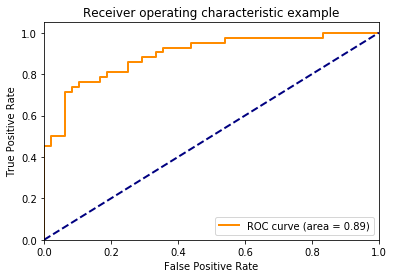

In [25]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [31]:
def train_score_Classifier(sklearn_Classifier, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
   
    # Step 1: Initializing the general sklearn Classifier with the model's specific parameters 
    Classifier = sklearn_Classifier(**model_parameters)
    
    # Step 2: Training the model on the X_train dataset of features and y_train, the associated target features
    Classifier.fit(X_train, y_train)
    
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    train_score = Classifier.score(X_train, y_train)
    test_score = Classifier.score(X_test, y_test)
    
    # Printing results
    print('Train Set Score:', train_score)
    print('Test Set Score:', test_score)
    
    return Classifier

In [34]:
trained_Classifier = train_score_Classifier(sklearn_Classifier = DecisionTreeClassifier,
                                          X_train = X_train, 
                                          y_train = y_train, 
                                          X_test = X_test, 
                                          y_test = y_test, 
                                          model_parameters = {'random_state':42})

Train Set Score: 1.0
Test Set Score: -0.02678571428571441


**Parameter tuning**

In [37]:
# Define the model parameters 
# We are fixing the random state so that the results are reproducible and consistent.
parameters = {"max_depth":2,
              'random_state':42}

# Train and evaluate the model
trained_Classifier = train_score_Classifier(sklearn_Classifier=DecisionTreeClassifier,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=parameters)

Train Set Score: 0.42997585761278195
Test Set Score: 0.27017227608816974


**GridSearchCV**

In [40]:
# Set parameters to search through - known as parameter grid
parameters = {'max_depth': [6, 4, 10], 
              'min_samples_split':[0.1, 0.05, 0.2], 
              'min_samples_leaf': [10, 20, 30]}

# Initialize model
decision_Classifier= DecisionTreeRegressor(random_state=42)

# Initialize GridSearch and then fit
Classifier = GridSearchCV(decision_Classifier, parameters)
Classifier.fit(X_train, y_train)

C:\Users\CHERPENS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [6, 4, 10],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [0.1, 0.05, 0.2]},
             pre_dispatch='2*n_jobs

In [41]:
# printing out what GridSearchCV found to be the best parameters 
Classifier.best_estimator_.get_params()

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [42]:
# evaluate the tuned model
trained_Classifier = train_score_Classifier(sklearn_Classifier=DecisionTreeClassifier,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=Classifier.best_estimator_.get_params())

Train Set Score: 0.47270511150034156
Test Set Score: 0.2977319744494674
